<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Data-files" data-toc-modified-id="Data-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data files</a></span><ul class="toc-item"><li><span><a href="#Metadata-for-the-database" data-toc-modified-id="Metadata-for-the-database-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Metadata for the database</a></span></li><li><span><a href="#Setting-the-file-paths" data-toc-modified-id="Setting-the-file-paths-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Setting the file paths</a></span></li><li><span><a href="#How-to-load-and-read-a-json-file" data-toc-modified-id="How-to-load-and-read-a-json-file-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>How to load and read a json file</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#TODO:-Clean-first-word-dirty-data" data-toc-modified-id="TODO:-Clean-first-word-dirty-data-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>TODO: Clean first word dirty data</a></span></li><li><span><a href="#END-TODO" data-toc-modified-id="END-TODO-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>END TODO</a></span></li></ul></li><li><span><a href="#Forming-n-grams" data-toc-modified-id="Forming-n-grams-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Forming n-grams</a></span></li></ul></li><li><span><a href="#Word-Cloud-of-Abstracts" data-toc-modified-id="Word-Cloud-of-Abstracts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Word Cloud of Abstracts</a></span></li></ul></div>

# Goal

There is a need to respond quickly to changes in today's world. This response may sometimes require understanding of a topic. Given any topic, there is a plethora of sources providing seas of data related to the it. Given todays world condition, a global concern is the treatment and handling of the COVID-19 pandemic. Given the rising amount of literature regarding the subject, it will be difficult for a scientist to keep up with today's literature.
> Is it possible to cluster these tens of thousands of articles to make it easier for a scientist to find relevant research articles?



In [6]:
from datetime import datetime
start_time = datetime.now()
import pandas as pd
import os
import json
import glob
end_time = datetime.now()
print(f'Time for imports only: {end_time-start_time}')

Time for imports only: 0:00:00.814822


In [7]:
root_path = "D:/CORD-19-research-challenge/"
metadata_path = f'{root_path}/metadata.csv'
biorxiv_medrxiv_path = "D:/CORD-19-research-challenge/biorxiv_medrxiv/biorxiv_medrxiv"

In [8]:
os.chdir(root_path)
os.listdir()

['.ipynb_checkpoints',
 'biorxiv_medrxiv',
 'comm_use_subset',
 'cord_19_embeddings_4_17',
 'COVID.DATA.LIC.AGMT.pdf',
 'CS535-Team5-TopicBasedSearchEngine-CORD-19(2).ipynb',
 'CS535-Team5-TopicBasedSearchEngine-CORD-19.ipynb',
 'custom_license',
 'json_schema.txt',
 'metadata.csv',
 'metadata.readme',
 'noncomm_use_subset']

# Data files

The data files that we have been given are of the format that follows:

![title](images/article_format.png)

## Metadata for the database

We are given a metadata file that gives us the filename of each article along with its abstract and some other details such as date published and journal that it was published in.

In [9]:
meta = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
2,le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


In [10]:
meta[meta['abstract'] == '']

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url


In [11]:
meta.count()

cord_uid                       52398
sha                            39024
source_x                       52398
title                          52240
doi                            49058
pmcid                          43652
pubmed_id                      38058
license                        52398
abstract                       43168
publish_time                   52390
authors                        50119
journal                        47156
Microsoft Academic Paper ID      964
WHO #Covidence                  1768
has_pdf_parse                  52398
has_pmc_xml_parse              52398
full_text_file                 43794
url                            52096
dtype: int64

In [12]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52398 entries, 0 to 52397
Data columns (total 18 columns):
cord_uid                       52398 non-null object
sha                            39024 non-null object
source_x                       52398 non-null object
title                          52240 non-null object
doi                            49058 non-null object
pmcid                          43652 non-null object
pubmed_id                      38058 non-null object
license                        52398 non-null object
abstract                       43168 non-null object
publish_time                   52390 non-null object
authors                        50119 non-null object
journal                        47156 non-null object
Microsoft Academic Paper ID    964 non-null object
WHO #Covidence                 1768 non-null object
has_pdf_parse                  52398 non-null bool
has_pmc_xml_parse              52398 non-null bool
full_text_file                 43794 non-null obje

Let us look at the column marked "SHA". At a closer look, we can see that it seems to be a hash of some kind.

But looking into the folders, we see that this unique hash has been ingeniously used to identify each file. i.e. We don't need to refer to a long paper title to find its file contents. Instead we can just scan the home directory for a file with that hash.json.

In [13]:
meta["sha"][0]

'1e1286db212100993d03cc22374b624f7caee956'

Now the source_x column is of importance for us as well. It refers to the source journal of each paper. This is important because the papers have been organized into folders, each representing a different source. e.g. a biorxiv folder, a WHO document folder etc.

In [14]:
meta.source_x.unique()

array(['PMC', 'Elsevier', 'CZI', 'WHO', 'biorxiv', 'medrxiv'],
      dtype=object)

## Setting the file paths

As we can see, there are up to six different sources whose documents we have been provided. We can try to make the document search easy by trying to make a dictionary to map sources with folder paths to search for each row of the document.

In [15]:
file_path = {}
file_path.fromkeys(meta.source_x.unique())

{'PMC': None,
 'Elsevier': None,
 'CZI': None,
 'WHO': None,
 'biorxiv': None,
 'medrxiv': None}

In [16]:
file_path['biorxiv'] = "D:/CORD-19-research-challenge/"

In [17]:
os.chdir(file_path['biorxiv'])

Let us read some of the biorxiv files into variables to see the structure as viewed in the screenshot before section 2.1.

In [18]:
article_array = {}
for i in range(5):
    #article_array[i] = json.load(open(meta["sha"][i] + ".json"))
    pass

In [19]:
for i in range(5):
    #print(article_array[i])
    pass

In [20]:
#article_array[0].keys()

From above, we can see that there are keys that describe each paper of the biorxiv journal. Of these, Our paritcular interest lies in the abstract and the body_text. The title is useful too, and to get it, we have to look inside the metadata part of the file. 

In [21]:
#article_array[0]['metadata'].keys()

If printed as a whole, each file would look like the below output:

In [22]:
#f = open('04dc6d9c1e3f28e2b57934301593cf3da58b9935.json')
#for line in f:
    #print(line)

## How to load and read a json file

In [23]:
import json

#with open('04dc6d9c1e3f28e2b57934301593cf3da58b9935.json') as f:
  #data = json.load(f)

#print(data)

In [24]:
#data.keys()

In [25]:
#for entry in data['abstract']:
    #print(entry['section'],"\n",entry['text'])

In [26]:
def load_json(filename):
    with open(filename +  ".json") as f:
        data = json.load(f)
    return data

Code to read all json files in the directory in one go (Cite: [Kernel on Kaggle](https://www.kaggle.com/maksimeren/covid-19-literature-clustering))

In [27]:
all_json = glob.glob(f'{biorxiv_medrxiv_path}/**/*.json', recursive=True)
len(all_json)

1934

In [28]:
all_json[0]

'D:/CORD-19-research-challenge/biorxiv_medrxiv/biorxiv_medrxiv\\pdf_json\\0015023cc06b5362d332b3baf348d11567ca2fbb.json'

Let's make a class so that we could refer to the loaded articles easily

In [29]:
class Article:
    
    def __init__(self,filepath):
        with open(filepath) as f:
            metadata = json.load(f)
            self.paper_id = metadata['paper_id']
            self.title = metadata['metadata']['title']
            self.abstract = ""
            self.body_text = ""
            
            #Abstract
            for entry in metadata['abstract']:
                self.abstract += str(entry['text'])
            

            #body_text
            for entry in metadata['body_text']:
                self.body_text += str(entry['text'])


            
    def __repr__(self):
        return f'Article Object with id: {self.paper_id} \n title:{self.title} \n abstract:{self.abstract}'
            
                       

In [30]:
articles = {}
for i in range(5):
    articles[i] = Article(all_json[i])

In [31]:
articles[0].abstract

'word count: 194 22 Text word count: 5168 23 24 25 author/funder. All rights reserved. No reuse allowed without permission. Abstract 27 The positive stranded RNA genomes of picornaviruses comprise a single large open reading 28 frame flanked by 5′ and 3′ untranslated regions (UTRs). Foot-and-mouth disease virus (FMDV) 29 has an unusually large 5′ UTR (1.3 kb) containing five structural domains. These include the 30 internal ribosome entry site (IRES), which facilitates initiation of translation, and the cis-acting 31 replication element (cre). Less well characterised structures are a 5′ terminal 360 nucleotide 32 stem-loop, a variable length poly-C-tract of approximately 100-200 nucleotides and a series of 33 two to four tandemly repeated pseudoknots (PKs). We investigated the structures of the PKs 34 by selective 2′ hydroxyl acetylation analysed by primer extension (SHAPE) analysis and 35 determined their contribution to genome replication by mutation and deletion experiments. 36 SHAP

In [32]:
articles[1]

Article Object with id: 00340eea543336d54adda18236424de6a5e91c9d 
 title:Analysis Title: Regaining perspective on SARS-CoV-2 molecular tracing and its implications 
 abstract:During the past three months, a new coronavirus (SARS-CoV-2) epidemic has been growing exponentially, affecting over 100 thousand people worldwide, and causing enormous distress to economies and societies of affected countries. A plethora of analyses based on viral sequences has already been published, in scientific journals as well as through non-peer reviewed channels, to investigate SARS-CoV-2 genetic heterogeneity and spatiotemporal dissemination. We examined all full genome sequences currently available to assess the presence of sufficient information for reliable phylogenetic and phylogeographic studies. Our analysis clearly shows severe limitations in the present data, in light of which any finding should be considered, at the very best, preliminary and hypothesis-generating. Hence the need for avoiding sti

# Data Cleaning

Now that we have explored the structure of the dataset, let us focus on our areas of interest as mentioned earlier: namely the Title, Abstract and the body of the text.\
We know that we can access these for a given paper by scanning the metadata for a paper of choice for its title and abstract, and if we need it, using its `sha` column value to get the full text of the paper.

First let us clean the metadata by dropping all NA valued rows for the title, sha and abstract columns.

[Pandas filter rows](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)

In [33]:
bio = meta.loc[meta['source_x'] == 'biorxiv']

In [34]:
print(f'Meta count:{len(meta)} biorxiv papers count: {len(bio)}')

Meta count:52398 biorxiv papers count: 867


In [35]:
bio_clean = bio.drop_duplicates().dropna()

In [36]:
len(bio_clean)

0

Using the above dropna condition doesn't work out,  number of rows in the resulting dataframe is zero.
We found a solution Cite: [stack overflow post](https://stackoverflow.com/questions/39241346/pandas-dropna-on-specify-attribute)

In [37]:
bio_clean = bio.loc[~(bio.sha.isnull())]

In [38]:
len(bio_clean)

767

In [39]:
bio_clean.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
31175,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/001727
31176,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/003889
31177,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/006866
31178,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/007476
31179,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [40]:
print(bio_clean['source_x'].unique(),
bio_clean['pmcid'].unique(),
bio_clean['pubmed_id'].unique(),
bio_clean['Microsoft Academic Paper ID'].unique(),
bio_clean['WHO #Covidence'].unique())

['biorxiv'] [nan] [nan] [nan] [nan]


In [41]:
bio_slim = bio_clean.drop(['Microsoft Academic Paper ID','WHO #Covidence','pubmed_id','pmcid'], axis = 1)

In [42]:
bio_slim = bio_slim.drop(['url','doi','license','full_text_file'],axis =1 )

In [43]:
bio_slim = bio_slim[~bio_slim.isin(['False'])]

As we had seen at the send of section 2.3, all_json contains the paths of all the json files(i.e. the articles) in it.
Now we should load this into a dataframe for it to be queryable

In [44]:
for i, j in enumerate(all_json):
    #print(i,j)
    pass

In [45]:
#loaddict = 
articles = {}
start_time = datetime.now()
for i,path in enumerate(all_json):
    if(i % 5000 == 0):
        print(f'Processing {i} of {len(all_json)}')
    try:
        articles[i] = Article(all_json[i])
    except Exception as e:
        continue
end_time = datetime.now()
print(f' time taken : {(end_time  - start_time)}')

Processing 0 of 1934
 time taken : 0:00:02.042539


In [46]:
#print(articles[0].paper_id,"\n\n",articles[0].abstract,"\n\n", articles[0].body_text)

In [47]:
len(articles)

1934

In [48]:
#all_json

In [49]:
dict_ = {'paper_id': [], 'abstract': [], 'body_text': [], 'authors': [], 'title': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = Article(entry)
    except Exception as e:
        continue
    
    # get metadata information
    meta_data = meta.loc[meta['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue

    dict_['body_text'].append(content.body_text)
    
       
    # get metadata information
    meta_data = meta.loc[meta['sha'] == content.paper_id]
    
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # more than 2 authors, may be problem when plotting, so take first 2 append with ...
            dict_['authors'].append(". ".join(authors[:2]) + "...")
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = meta_data['title'].values[0], 40
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
       
    dict_['paper_id'].append(meta_data['sha'].values[0])
    dict_['abstract'].append(meta_data['abstract'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text', 'authors', 'title'])
df_covid.head()

Processing index: 0 of 1934
Processing index: 193 of 1934
Processing index: 386 of 1934
Processing index: 579 of 1934
Processing index: 772 of 1934
Processing index: 965 of 1934
Processing index: 1158 of 1934
Processing index: 1351 of 1934
Processing index: 1544 of 1934
Processing index: 1737 of 1934
Processing index: 1930 of 1934


,paper_id,abstract,body_text,authors,title
0,0015023cc06b5362d332b3baf348d11567ca2fbb,AbstractThe positive stranded RNA genomes of p...,"VP3, and VP0 (which is further processed to VP...",Joseph C. Ward. Lidia Lasecka-Dykes...,(The RNA pseudoknots in foot-and-mouth disease...
1,00340eea543336d54adda18236424de6a5e91c9d,"During the past three months, a new coronaviru...","In December 2019, a novel coronavirus, SARS-Co...",Carla Mavian. Simone Marini...,(Regaining perspective on SARS-CoV-2 molecular...
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,We integrate the human movement and healthcare...,The 2019-nCoV epidemic has spread across China...,Hanchu Zhou. Jianan Yang...,(Healthcare-resource-adjusted vulnerabilities ...
3,005d189d5bd7ac01aee65e934fd3d5186a3f7b27,The rapid outbreak of the new Coronavirus (COV...,The outbreak of infectious diseases has always...,Behzad Pirouz. Amirsina Golmohammadi...,(Relationship between Average Daily Temperatur...
4,00911cf4f99a3d5ae5e5b787675646a743574496,ABSTRARCTThe fast accumulation of viral metage...,"Metagenomic sequencing, which allows us to dir...",Jiayu Shang. Yanni Sun,(CHEER: hierarCHical taxonomic classification ...


In [50]:
print(len(dict_['paper_id']),len(dict_['abstract']),len(dict_['body_text']),len(dict_['authors']),len(dict_['title']))

1934 1934 1934 1934 1934


In [51]:
len(df_covid['abstract'][0].strip().split())

194

In [52]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(str(x).strip().split()))
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(str(x).strip().split()))
df_covid.head(10)

,paper_id,abstract,body_text,authors,title,abstract_word_count,body_word_count
0,0015023cc06b5362d332b3baf348d11567ca2fbb,AbstractThe positive stranded RNA genomes of p...,"VP3, and VP0 (which is further processed to VP...",Joseph C. Ward. Lidia Lasecka-Dykes...,(The RNA pseudoknots in foot-and-mouth disease...,194,1709
1,00340eea543336d54adda18236424de6a5e91c9d,"During the past three months, a new coronaviru...","In December 2019, a novel coronavirus, SARS-Co...",Carla Mavian. Simone Marini...,(Regaining perspective on SARS-CoV-2 molecular...,138,2487
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,We integrate the human movement and healthcare...,The 2019-nCoV epidemic has spread across China...,Hanchu Zhou. Jianan Yang...,(Healthcare-resource-adjusted vulnerabilities ...,34,749
3,005d189d5bd7ac01aee65e934fd3d5186a3f7b27,The rapid outbreak of the new Coronavirus (COV...,The outbreak of infectious diseases has always...,Behzad Pirouz. Amirsina Golmohammadi...,(Relationship between Average Daily Temperatur...,249,2791
4,00911cf4f99a3d5ae5e5b787675646a743574496,ABSTRARCTThe fast accumulation of viral metage...,"Metagenomic sequencing, which allows us to dir...",Jiayu Shang. Yanni Sun,(CHEER: hierarCHical taxonomic classification ...,139,5153
5,009ceadbb6f9f0d597b9516f0b9ca01e40231aad,Objective: Describe the changes in patient pop...,Since its emergence in December 2019 the novel...,Omar Badawi. Xinggang Liu...,(Impact of COVID-19 pandemic on severity of il...,292,1409
6,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,AbstractInfectious bronchitis (IB) causes sign...,"Infectious bronchitis (IB), which is caused by...",Salman L. Butt. Eric C. Erwood...,"(Real-time, MinION-based, amplicon sequencing ...",248,3958
7,00eb9220dc8cd351393b6b035323d350f103f8c6,"Importance: As with other traumatic events, pa...","Evidence from prior pandemics suggests that, a...",Victor M. Castro. Roy H Perlis,(Impact of COVID-19 on psychiatric assessment ...,246,2103
8,0109d1273b2d59a099ab66cdad6939d5e7fcb2e8,In severe cases of coronavirus disease 2019 (C...,"To date, the coronavirus disease 2019 (COVID-1...",Yu Zuo. Srilakshmi Yalavarthi...,(Neutrophil extracellular traps (NETs) as mark...,247,2734
9,0139ea4ca580af99b602c6435368e7fdbefacb03,AbstractBackgroundNipah Virus (NiV) came into ...,Nipah is an infectious negative-sense single-s...,Nishi Kumari. Ayush Upadhyay...,(A Combined Evidence Approach to Prioritize Ni...,326,2382


In [53]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 7 columns):
paper_id               1934 non-null object
abstract               1933 non-null object
body_text              1934 non-null object
authors                1934 non-null object
title                  1934 non-null object
abstract_word_count    1934 non-null int64
body_word_count        1934 non-null int64
dtypes: int64(2), object(5)
memory usage: 105.8+ KB


In [54]:
df_covid['abstract'].describe(include='all')

count                                                  1933
unique                                                 1932
top       Fast testing can help mitigate the coronavirus...
freq                                                      2
Name: abstract, dtype: object

In [55]:
df_covid['body_text'].describe(include='all')

count                                                  1934
unique                                                 1934
top       This systematic review and meta-analysis will ...
freq                                                      1
Name: body_text, dtype: object

The differencre between the unique count and the total count means that there are some duplicate abstracts.
It is also possible that there are blank abstracts that are being counted as the same. 

In [56]:
df_covid2 = df_covid.copy()

In [57]:
df_covid2.drop_duplicates(['body_text'],inplace=True)

In [58]:
df_covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 1933
Data columns (total 7 columns):
paper_id               1934 non-null object
abstract               1933 non-null object
body_text              1934 non-null object
authors                1934 non-null object
title                  1934 non-null object
abstract_word_count    1934 non-null int64
body_word_count        1934 non-null int64
dtypes: int64(2), object(5)
memory usage: 120.9+ KB


In [59]:
df_covid2.describe()

,abstract_word_count,body_word_count
count,1934.000000,1934.000000
mean,222.068769,2986.755429
std,92.719230,2207.443432
min,1.000000,43.000000
25%,152.000000,1616.750000
50%,216.000000,2539.000000
75%,270.000000,3748.500000
max,678.000000,44519.000000


In [60]:
df_covid.describe()

,abstract_word_count,body_word_count
count,1934.000000,1934.000000
mean,222.068769,2986.755429
std,92.719230,2207.443432
min,1.000000,43.000000
25%,152.000000,1616.750000
50%,216.000000,2539.000000
75%,270.000000,3748.500000
max,678.000000,44519.000000


We now clean the text data so that our key words are clear and we do not have to worry about details we are not concerned about. [ref1](https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79)  [ref2](https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/)

Firstly By now looking at the abstract columns, we must notice that the text scraped from these articles is not perfect.

For example, many of the abstracts start with the word *Abstract* glued to the beginning of the first word of the real abstract body. 

In [61]:
df_covid2['abstract'] = df_covid2['abstract'].apply(lambda x: str(x).replace('Abstract',''))
df_covid2.head(10)

,paper_id,abstract,body_text,authors,title,abstract_word_count,body_word_count
0,0015023cc06b5362d332b3baf348d11567ca2fbb,The positive stranded RNA genomes of picornavi...,"VP3, and VP0 (which is further processed to VP...",Joseph C. Ward. Lidia Lasecka-Dykes...,(The RNA pseudoknots in foot-and-mouth disease...,194,1709
1,00340eea543336d54adda18236424de6a5e91c9d,"During the past three months, a new coronaviru...","In December 2019, a novel coronavirus, SARS-Co...",Carla Mavian. Simone Marini...,(Regaining perspective on SARS-CoV-2 molecular...,138,2487
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,We integrate the human movement and healthcare...,The 2019-nCoV epidemic has spread across China...,Hanchu Zhou. Jianan Yang...,(Healthcare-resource-adjusted vulnerabilities ...,34,749
3,005d189d5bd7ac01aee65e934fd3d5186a3f7b27,The rapid outbreak of the new Coronavirus (COV...,The outbreak of infectious diseases has always...,Behzad Pirouz. Amirsina Golmohammadi...,(Relationship between Average Daily Temperatur...,249,2791
4,00911cf4f99a3d5ae5e5b787675646a743574496,ABSTRARCTThe fast accumulation of viral metage...,"Metagenomic sequencing, which allows us to dir...",Jiayu Shang. Yanni Sun,(CHEER: hierarCHical taxonomic classification ...,139,5153
5,009ceadbb6f9f0d597b9516f0b9ca01e40231aad,Objective: Describe the changes in patient pop...,Since its emergence in December 2019 the novel...,Omar Badawi. Xinggang Liu...,(Impact of COVID-19 pandemic on severity of il...,292,1409
6,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...",Salman L. Butt. Eric C. Erwood...,"(Real-time, MinION-based, amplicon sequencing ...",248,3958
7,00eb9220dc8cd351393b6b035323d350f103f8c6,"Importance: As with other traumatic events, pa...","Evidence from prior pandemics suggests that, a...",Victor M. Castro. Roy H Perlis,(Impact of COVID-19 on psychiatric assessment ...,246,2103
8,0109d1273b2d59a099ab66cdad6939d5e7fcb2e8,In severe cases of coronavirus disease 2019 (C...,"To date, the coronavirus disease 2019 (COVID-1...",Yu Zuo. Srilakshmi Yalavarthi...,(Neutrophil extracellular traps (NETs) as mark...,247,2734
9,0139ea4ca580af99b602c6435368e7fdbefacb03,BackgroundNipah Virus (NiV) came into limeligh...,Nipah is an infectious negative-sense single-s...,Nishi Kumari. Ayush Upadhyay...,(A Combined Evidence Approach to Prioritize Ni...,326,2382


Now let us remove all punctuation from text and change it to lowercase

# Data Preprocessing

In [62]:
start_time = datetime.now()
import nltk 
import string 
import re 
end_time = datetime.now()
print(f'imported text preprocessing libraries, time taken:{end_time-start_time}')

imported text preprocessing libraries, time taken:0:00:01.261625


In [63]:
df_covid2['abstract'] = df_covid2['abstract'].apply(lambda x: str(x).lower())
df_covid2.head()

,paper_id,abstract,body_text,authors,title,abstract_word_count,body_word_count
0,0015023cc06b5362d332b3baf348d11567ca2fbb,the positive stranded rna genomes of picornavi...,"VP3, and VP0 (which is further processed to VP...",Joseph C. Ward. Lidia Lasecka-Dykes...,(The RNA pseudoknots in foot-and-mouth disease...,194,1709
1,00340eea543336d54adda18236424de6a5e91c9d,"during the past three months, a new coronaviru...","In December 2019, a novel coronavirus, SARS-Co...",Carla Mavian. Simone Marini...,(Regaining perspective on SARS-CoV-2 molecular...,138,2487
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,we integrate the human movement and healthcare...,The 2019-nCoV epidemic has spread across China...,Hanchu Zhou. Jianan Yang...,(Healthcare-resource-adjusted vulnerabilities ...,34,749
3,005d189d5bd7ac01aee65e934fd3d5186a3f7b27,the rapid outbreak of the new coronavirus (cov...,The outbreak of infectious diseases has always...,Behzad Pirouz. Amirsina Golmohammadi...,(Relationship between Average Daily Temperatur...,249,2791
4,00911cf4f99a3d5ae5e5b787675646a743574496,abstrarctthe fast accumulation of viral metage...,"Metagenomic sequencing, which allows us to dir...",Jiayu Shang. Yanni Sun,(CHEER: hierarCHical taxonomic classification ...,139,5153


In [64]:
df_covid2['body_text'] = df_covid2['body_text'].apply(lambda x: str(x).lower())
df_covid2.head()

,paper_id,abstract,body_text,authors,title,abstract_word_count,body_word_count
0,0015023cc06b5362d332b3baf348d11567ca2fbb,the positive stranded rna genomes of picornavi...,"vp3, and vp0 (which is further processed to vp...",Joseph C. Ward. Lidia Lasecka-Dykes...,(The RNA pseudoknots in foot-and-mouth disease...,194,1709
1,00340eea543336d54adda18236424de6a5e91c9d,"during the past three months, a new coronaviru...","in december 2019, a novel coronavirus, sars-co...",Carla Mavian. Simone Marini...,(Regaining perspective on SARS-CoV-2 molecular...,138,2487
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,we integrate the human movement and healthcare...,the 2019-ncov epidemic has spread across china...,Hanchu Zhou. Jianan Yang...,(Healthcare-resource-adjusted vulnerabilities ...,34,749
3,005d189d5bd7ac01aee65e934fd3d5186a3f7b27,the rapid outbreak of the new coronavirus (cov...,the outbreak of infectious diseases has always...,Behzad Pirouz. Amirsina Golmohammadi...,(Relationship between Average Daily Temperatur...,249,2791
4,00911cf4f99a3d5ae5e5b787675646a743574496,abstrarctthe fast accumulation of viral metage...,"metagenomic sequencing, which allows us to dir...",Jiayu Shang. Yanni Sun,(CHEER: hierarCHical taxonomic classification ...,139,5153


In [65]:
print("Punctuated:\n",df_covid2['abstract'][1],'\n\n\n')
translator = str.maketrans('','',string.punctuation)
print("Cleaned:\n",df_covid2['abstract'][1].translate(translator))

Punctuated:
 during the past three months, a new coronavirus (sars-cov-2) epidemic has been growing exponentially, affecting over 100 thousand people worldwide, and causing enormous distress to economies and societies of affected countries. a plethora of analyses based on viral sequences has already been published, in scientific journals as well as through non-peer reviewed channels, to investigate sars-cov-2 genetic heterogeneity and spatiotemporal dissemination. we examined all full genome sequences currently available to assess the presence of sufficient information for reliable phylogenetic and phylogeographic studies. our analysis clearly shows severe limitations in the present data, in light of which any finding should be considered, at the very best, preliminary and hypothesis-generating. hence the need for avoiding stigmatization based on partial information, and for continuing concerted efforts to increase number and quality of the sequences required for robust tracing of the 

In [66]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
df_covid2['abstract'] = df_covid2['abstract'].apply(lambda x: str(x).translate(translator))
df_covid2.head()

,paper_id,abstract,body_text,authors,title,abstract_word_count,body_word_count
0,0015023cc06b5362d332b3baf348d11567ca2fbb,the positive stranded rna genomes of picornavi...,"vp3, and vp0 (which is further processed to vp...",Joseph C. Ward. Lidia Lasecka-Dykes...,(The RNA pseudoknots in foot-and-mouth disease...,194,1709
1,00340eea543336d54adda18236424de6a5e91c9d,during the past three months a new coronavirus...,"in december 2019, a novel coronavirus, sars-co...",Carla Mavian. Simone Marini...,(Regaining perspective on SARS-CoV-2 molecular...,138,2487
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,we integrate the human movement and healthcare...,the 2019-ncov epidemic has spread across china...,Hanchu Zhou. Jianan Yang...,(Healthcare-resource-adjusted vulnerabilities ...,34,749
3,005d189d5bd7ac01aee65e934fd3d5186a3f7b27,the rapid outbreak of the new coronavirus covi...,the outbreak of infectious diseases has always...,Behzad Pirouz. Amirsina Golmohammadi...,(Relationship between Average Daily Temperatur...,249,2791
4,00911cf4f99a3d5ae5e5b787675646a743574496,abstrarctthe fast accumulation of viral metage...,"metagenomic sequencing, which allows us to dir...",Jiayu Shang. Yanni Sun,(CHEER: hierarCHical taxonomic classification ...,139,5153


In [68]:
df_covid2['body_text'] = df_covid2['body_text'].apply(lambda x: str(x).translate(translator))
df_covid2.head()

,paper_id,abstract,body_text,authors,title,abstract_word_count,body_word_count
0,0015023cc06b5362d332b3baf348d11567ca2fbb,the positive stranded rna genomes of picornavi...,vp3 and vp0 which is further processed to vp2 ...,Joseph C. Ward. Lidia Lasecka-Dykes...,(The RNA pseudoknots in foot-and-mouth disease...,194,1709
1,00340eea543336d54adda18236424de6a5e91c9d,during the past three months a new coronavirus...,in december 2019 a novel coronavirus sarscov2 ...,Carla Mavian. Simone Marini...,(Regaining perspective on SARS-CoV-2 molecular...,138,2487
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,we integrate the human movement and healthcare...,the 2019ncov epidemic has spread across china ...,Hanchu Zhou. Jianan Yang...,(Healthcare-resource-adjusted vulnerabilities ...,34,749
3,005d189d5bd7ac01aee65e934fd3d5186a3f7b27,the rapid outbreak of the new coronavirus covi...,the outbreak of infectious diseases has always...,Behzad Pirouz. Amirsina Golmohammadi...,(Relationship between Average Daily Temperatur...,249,2791
4,00911cf4f99a3d5ae5e5b787675646a743574496,abstrarctthe fast accumulation of viral metage...,metagenomic sequencing which allows us to dire...,Jiayu Shang. Yanni Sun,(CHEER: hierarCHical taxonomic classification ...,139,5153


In [69]:
abstracts = df_covid2.drop(["paper_id","body_text", "abstract_word_count", "body_word_count", "authors", "title"], axis=1)
abstracts.head()

,abstract
0,the positive stranded rna genomes of picornavi...
1,during the past three months a new coronavirus...
2,we integrate the human movement and healthcare...
3,the rapid outbreak of the new coronavirus covi...
4,abstrarctthe fast accumulation of viral metage...


In [70]:
bodytexts = df_covid2.drop(["paper_id","abstract", "abstract_word_count", "body_word_count", "authors", "title"], axis=1)
bodytexts.head()

,body_text
0,vp3 and vp0 which is further processed to vp2 ...
1,in december 2019 a novel coronavirus sarscov2 ...
2,the 2019ncov epidemic has spread across china ...
3,the outbreak of infectious diseases has always...
4,metagenomic sequencing which allows us to dire...


### TODO: Clean first word dirty data

In [71]:
tempdf = pd.DataFrame(abstracts['abstract'].apply(lambda x:  (str(x).split())[0] if x != "" else x))
#print(tempdf.to_string())

In [72]:
tempdf['first_word'] = tempdf['abstract'].apply(lambda x: len(str(x)))
tempdf.head()

,abstract,first_word
0,the,3
1,during,6
2,we,2
3,the,3
4,abstrarctthe,12


In [73]:
tempdf[tempdf['first_word'] > 7]

,abstract,first_word
4,abstrarctthe,12
5,objective,9
6,infectious,10
7,importance,10
9,backgroundnipah,15
10,background,10
11,background,10
12,introduction,12
16,posttranscriptional,19
17,abstractduring,14


In [74]:
pattern = r'[background][summary][abstract]'
tempdf['abstract'].str.contains(pattern)

0       False
1        True
2       False
3       False
4        True
5       False
6        True
7        True
8       False
9        True
10       True
11       True
12       True
13      False
14       True
15      False
16       True
17       True
18      False
19       True
20       True
21       True
22      False
23       True
24      False
25       True
26      False
27      False
28      False
29       True
        ...  
1904    False
1905    False
1906    False
1907    False
1908    False
1909     True
1910     True
1911     True
1912    False
1913     True
1914    False
1915    False
1916    False
1917    False
1918    False
1919    False
1920    False
1921    False
1922     True
1923    False
1924     True
1925     True
1926     True
1927    False
1928     True
1929    False
1930     True
1931     True
1932    False
1933    False
Name: abstract, Length: 1934, dtype: bool

### END TODO

## Forming n-grams

# Word Cloud of Abstracts

# Vectorize with HashingVectorizer

In [75]:
from nltk import word_tokenize
from nltk.util import ngrams

In [76]:
words = []
for text in abstracts['abstract']:
    for word in text.split(" "):
        words.append(word)

In [77]:
print(words[:10])

['the', 'positive', 'stranded', 'rna', 'genomes', 'of', 'picornaviruses', 'comprise', 'a', 'single']


In [78]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(words)

In [79]:
X.shape

(429481, 4096)

#### Separete Training and Test Set

In [80]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X[:1000].toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 800
X_test size: 200 



# Dimensionality Reduction with t-SNE

In [81]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(X_train)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.081s...
[t-SNE] Computed neighbors for 800 samples in 4.286s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.343811
[t-SNE] KL divergence after 1000 iterations: 0.619654


Let's plot the result:

In [82]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)

plt.title("t-SNE Covid-19 Articles")
# plt.savefig("plots/t-sne_covid19.png")
plt.show()

<Figure size 1500x1500 with 1 Axes>

# Unsupervised Learning: Clustering with K-Means

In [83]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k, n_jobs=4, verbose=10)
y_pred = kmeans.fit_predict(X_train)

In [84]:
y_train = y_pred

In [85]:
y_test = kmeans.predict(X_test)

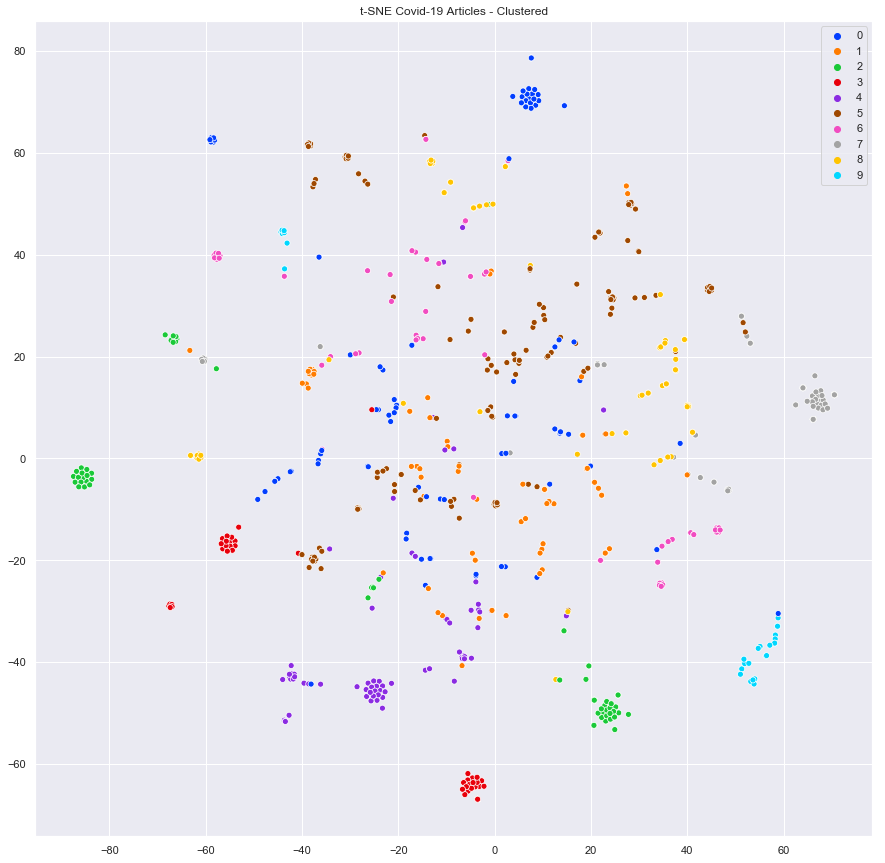

In [86]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

# * Merge from below part!

# Create Spark session

In [169]:
from pyspark.sql import SparkSession

appName = "PySpark"
master = "local"

# Create Spark session
spark = SparkSession.builder \
                    .appName(appName) \
                    .config("spark.driver.memory", "15g") \
                    .master(master) \
                    .getOrCreate()

# Find top N closest words

In [171]:
#Generate doc
localDoc = abstracts['abstract']
doc = spark.sparkContext.parallelize(localDoc).map(lambda line: line.split(" "))

In [173]:
from pyspark.mllib.feature import Word2Vec

# Learn a mapping from words to Vectors.
model = Word2Vec().fit(doc)

In [174]:
word = "corona"
topN = 10
synonyms = model.findSynonyms(word, topN)
result = [(s[0], s[1]) for s in synonyms]

In [177]:
result

[('caused', 0.8722241520881653),
 ('etiological', 0.8331533670425415),
 ('background', 0.8325658440589905),
 ('named', 0.8272594213485718),
 ('coronavirus', 0.8165912628173828),
 ('causing', 0.8161082863807678),
 ('backgroundthe', 0.8092041015625),
 ('disease2019', 0.8020564913749695),
 ('emerged', 0.7924125790596008),
 ('229e', 0.7856630682945251)]

# Feature Extraction and Transformation

### * Only used 10 abstracts

In [178]:
from pyspark.mllib.feature import HashingTF, IDF

# Load documents (one per line).
documents = spark.sparkContext.parallelize(abstracts['abstract'][:10]).map(lambda line: line.split(" "))

hashingTF = HashingTF(numFeatures = 2 ** 12)
tf = hashingTF.transform(documents)

# While applying HashingTF only needs a single pass to the data, applying IDF needs two passes:
# First to compute the IDF vector and second to scale the term frequencies by IDF.
tf.cache()
idf = IDF().fit(tf)
tfidf = idf.transform(tf)

# spark.mllib's IDF implementation provides an option for ignoring terms
# which occur in less than a minimum number of documents.
# In such cases, the IDF for these terms is set to 0.
# This feature can be used by passing the minDocFreq value to the IDF constructor.
idfIgnore = IDF(minDocFreq=2).fit(tf)
tfidfIgnore = idfIgnore.transform(tf)

In [179]:
import numpy as np
np.array(tfidfIgnore.collect()).shape

(10, 4096)

# PCA  & Clustering

In [180]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

rows = spark.sparkContext.parallelize(tfidfIgnore.collect())

mat = RowMatrix(rows)

# Compute the top (9 principal components.
# Principal components are stored in a local dense matrix.
pc = mat.computePrincipalComponents(9)

# Project the rows to the linear space spanned by the top (9 principal components.
projected = mat.multiply(pc)

In [181]:
projected.numRows(), projected.numCols()

(10, 9)

To separate the literature, k-means will be run on the vectorized text. Given the number of clusters, k, k-means will categorize each vector by taking the mean distance to a randomly initialized centroid. The centroids are updated iteratively.

# Elbow method to determine the optimal number of clusters for k-means clustering

In [250]:
from pyspark.mllib.clustering import KMeans

cost = np.zeros(20)
for k in range(2, 20):
    model = KMeans.train(projected.rows,
                         k,
                         maxIterations=10,
                         initializationMode="random",
                         seed=50,
                         initializationSteps=5,
                         epsilon=1e-4)

    cost[k] = model.computeCost(projected.rows)

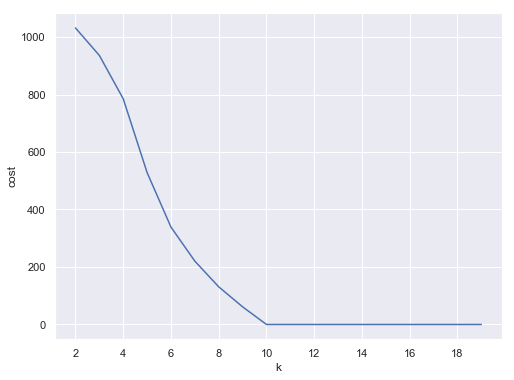

In [252]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20), cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Within Set Sum of Squared Error (WSSSE)

In [258]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [266]:
from pyspark.mllib.clustering import KMeans, KMeansModel

cluster_centers = []

# Build the model (cluster the data)
for k in range(2, 20):
    clusters = KMeans.train(projected.rows,
                            k,
                            maxIterations=10,
                            initializationMode="random",
                            seed=50,
                            initializationSteps=5,
                            epsilon=1e-4)
    
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))

    WSSSE = projected.rows.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(k, WSSSE))
    
    centers = clusters.clusterCenters
    
    cluster_centers.append(centers)

The cluster 2 has Within Set Sum of Squared Error 93.8619143285639
The cluster 3 has Within Set Sum of Squared Error 84.3107553691597
The cluster 4 has Within Set Sum of Squared Error 71.87213324219526
The cluster 5 has Within Set Sum of Squared Error 55.05745585366811
The cluster 6 has Within Set Sum of Squared Error 40.57852718289841
The cluster 7 has Within Set Sum of Squared Error 29.350106040903853
The cluster 8 has Within Set Sum of Squared Error 19.686247492787935
The cluster 9 has Within Set Sum of Squared Error 11.08523263391893
The cluster 10 has Within Set Sum of Squared Error 0.0
The cluster 11 has Within Set Sum of Squared Error 0.0
The cluster 12 has Within Set Sum of Squared Error 0.0
The cluster 13 has Within Set Sum of Squared Error 0.0
The cluster 14 has Within Set Sum of Squared Error 0.0
The cluster 15 has Within Set Sum of Squared Error 0.0
The cluster 16 has Within Set Sum of Squared Error 0.0
The cluster 17 has Within Set Sum of Squared Error 0.0
The cluster 18 h

In [ ]:
print("Cluster Centers: ")
for center in cluster_centers:
    #print(center)
    pass

In [306]:
projected.rows.collect()

[DenseVector([0.6416, 0.7393, 0.1907, 0.6379, 1.2012, -4.8564, -6.9568, -1.3488, -4.6145]),
 DenseVector([-0.5472, 0.411, -0.6961, -1.3148, -1.4175, 1.5755, 3.4735, -5.2414, -5.5419]),
 DenseVector([-0.2248, 0.0926, -0.0582, -0.1063, -0.2387, 0.2444, 0.1438, 0.1028, 1.8632]),
 DenseVector([8.5431, -14.6256, 1.3272, -0.8928, 0.4846, -0.8114, 0.0235, 0.6679, -3.7672]),
 DenseVector([0.3215, 1.5386, -1.4351, 0.4901, 4.061, -4.0572, 3.9071, 4.854, -4.8088]),
 DenseVector([-13.3987, -9.213, -4.0465, 3.4184, -2.1818, -1.3966, -0.3841, 1.0312, -3.8129]),
 DenseVector([2.645, -1.467, 5.1751, 11.0939, -3.185, -0.9186, 0.7899, 0.5611, -3.8561]),
 DenseVector([-0.9232, -0.5536, 1.3007, 0.028, -0.382, 7.0, -2.9916, 3.9935, -4.9452]),
 DenseVector([-7.8437, -3.8549, 11.5502, -2.7441, -0.1245, -2.0198, 0.4807, 0.8252, -3.7536]),
 DenseVector([1.8854, -0.7608, 0.235, -2.9424, -9.9433, -3.1455, 0.022, 3.0261, -4.0478])]

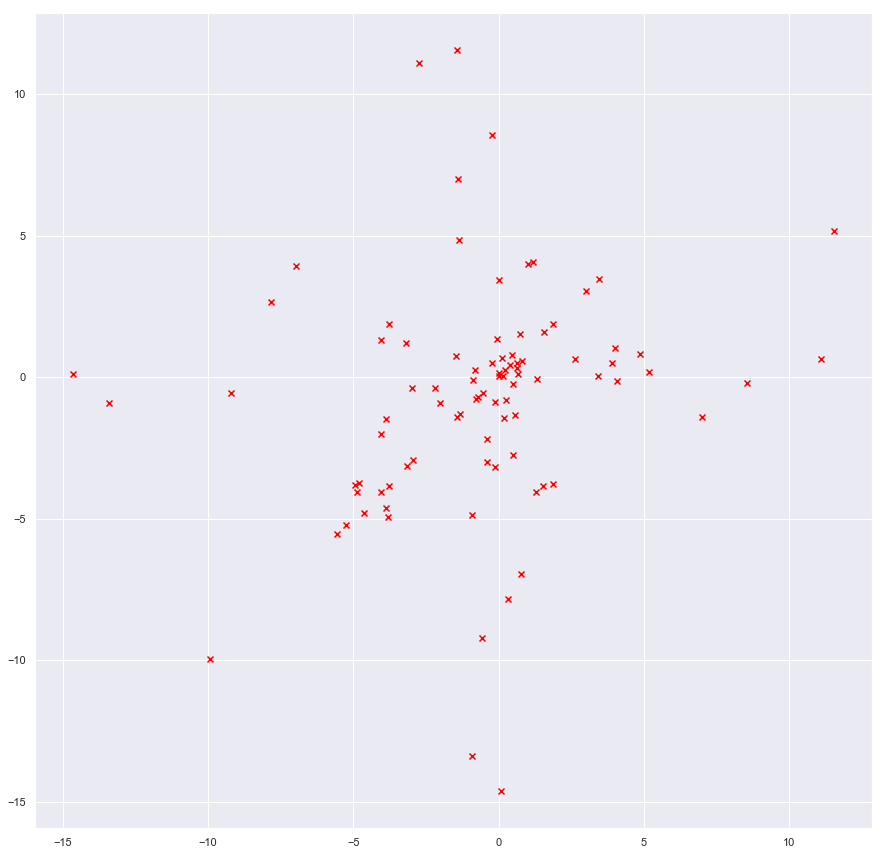

In [309]:
rdd_split_int = projected.rows.map(lambda x: [float(x[0]), float(x[1]), float(x[2]), float(x[3]), float(x[4]), float(x[5]), float(x[6]), float(x[7]), float(x[8])])

# Convert rdd_split_int RDD into Spark DataFrame
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2", "col3", "col4", "col5", "col6", "col7", "col8", "col9"])

# Convert Spark DataFrame into Pandas DataFrame
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

# Convert "cluster_centers" that you generated earlier into Pandas DataFrame
cluster_centers_pandas = pd.DataFrame(cluster_centers[8], columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7", "col8", "col9"])

# Create an overlaid scatter plot
plt.scatter(rdd_split_int_df_pandas, cluster_centers_pandas, color="red", marker="x")
plt.show()